In [1]:
import jax
import jax.numpy as jnp
from jaxoptics import ScalarField, Gaussian, HermiteGaussian
import matplotlib.pyplot as plt

In [2]:
print(jax.devices())

[CudaDevice(id=0)]


In [5]:
shape = (512, 600)
ds = (2e-6, 2e-6)
wavelength = 1.064e-6

gauss = Gaussian(w0=100e-6)(shape, ds)
hg10 = HermiteGaussian(w0=100e-6, m=1, n=0)(shape, ds)
hg11 = HermiteGaussian(w0=100e-6, m=1, n=1)(shape, ds)

field = ScalarField(jnp.stack([gauss, hg10, hg11], axis=0), ds, wavelength)

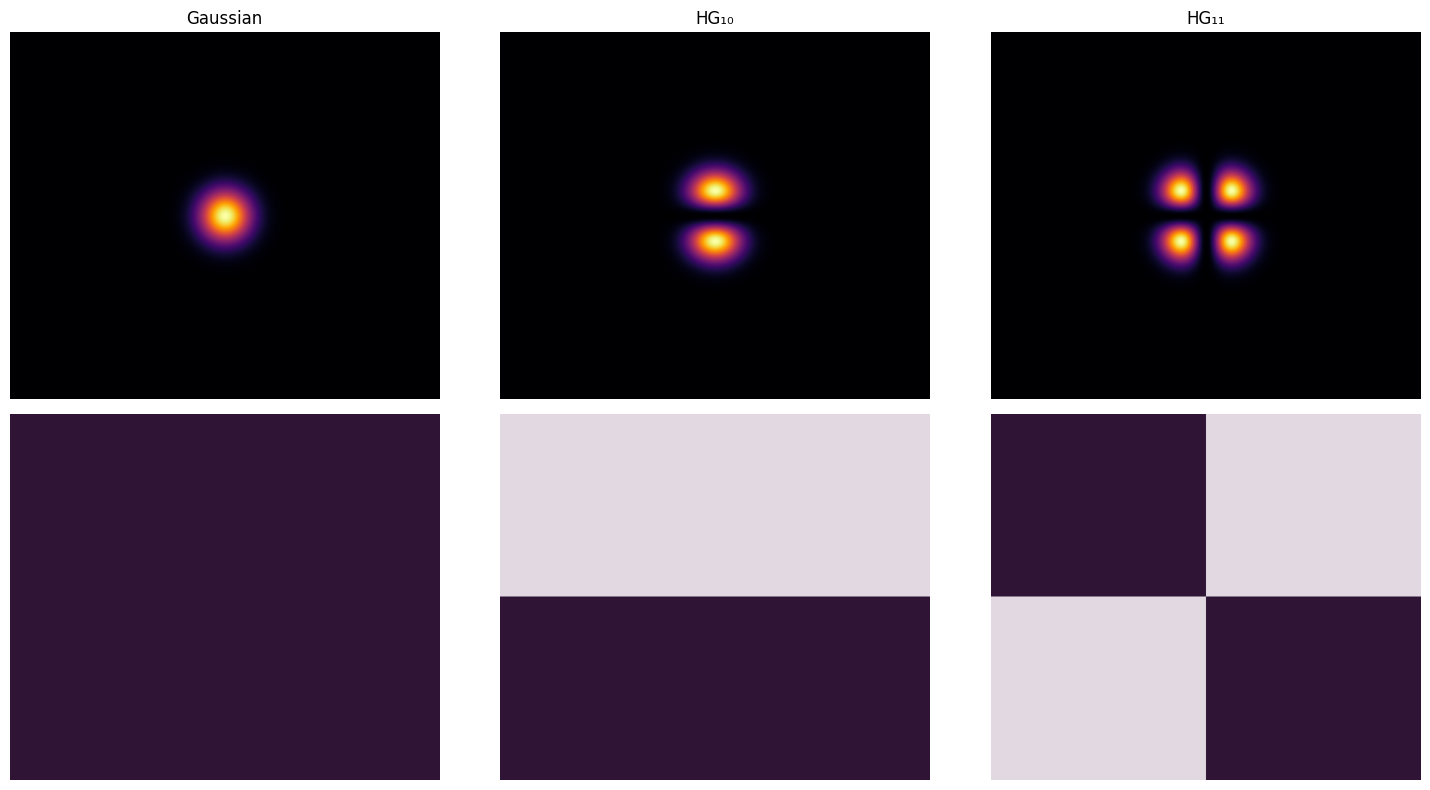

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
titles = ['Gaussian', 'HG₁₀', 'HG₁₁']

for i, title in enumerate(titles):
    axes[0, i].imshow(jnp.abs(field.electric[i])**2, cmap='inferno')
    axes[0, i].set_title(title)
    axes[0, i].axis('off')
    
    axes[1, i].imshow(jnp.angle(field.electric[i]), cmap='twilight', vmin=-jnp.pi, vmax=jnp.pi)
    axes[1, i].axis('off')

plt.tight_layout()